Este notebook tem como propósito aplicar o algoritmo Random Forest em conjuntos de dados de regressão para selecionar features adequadas para um projeto

https://scikit-learn.org/stable/modules/feature_selection.html

#### Criando regressão

In [1]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 500, n_features = 10, n_informative = 5, n_targets = 1)

#### Definindo modelo RF para feature selection

In [2]:
from sklearn.ensemble import RandomForestRegressor

In [3]:
rf = RandomForestRegressor()
rf.fit(X,y)

RandomForestRegressor()

#### Coeficientes de importância

In [5]:
importance = rf.feature_importances_
print(importance)

[0.0092843  0.01131658 0.01031807 0.25058902 0.01262428 0.34540492
 0.01137    0.01131276 0.13542568 0.20235437]


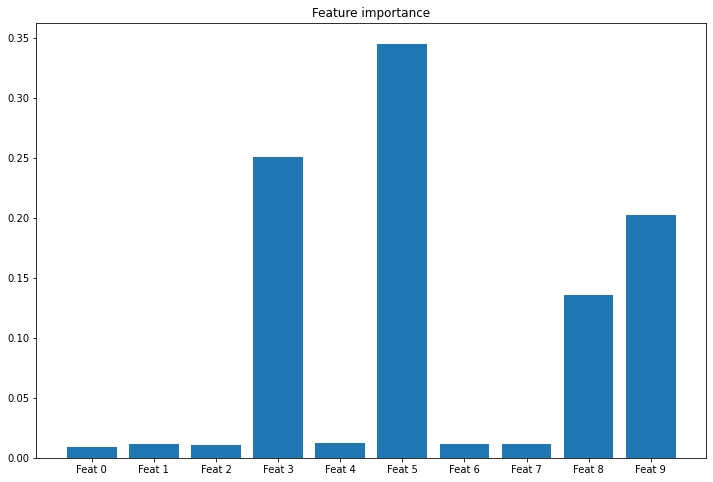

In [6]:
#Demonstrando importância de cada feature

from matplotlib import pyplot as plt
import numpy as np

label = []
for i, l in enumerate (importance):
    label.append("Feat "+str(i))

plt.figure(figsize=(12,8))

plt.bar(height = importance, x = label)

plt.title("Feature importance")
plt.show()

#### Definindo limiar > 0.15

In [7]:
from sklearn.feature_selection import SelectFromModel

In [8]:
# Definindo o limiar acima de 0.15

threshold = 0.15

sfm = SelectFromModel(rf, threshold = threshold)
sfm.fit(X, y)

print(sfm.get_support())

[False False False  True False  True False False False  True]


#### Testando em dados de Boston

In [9]:
from sklearn.datasets import load_boston

X,y = load_boston(return_X_y = True)
labels = load_boston().feature_names

In [11]:
#criando modelo e recebendo os coeficientes

rf = RandomForestRegressor()
rf.fit(X,y)

importance = rf.feature_importances_ 
print(importance)

[0.04026615 0.00121083 0.00581233 0.0012314  0.02399289 0.39143863
 0.01383884 0.06667334 0.00280434 0.0146245  0.0172441  0.01255356
 0.4083091 ]


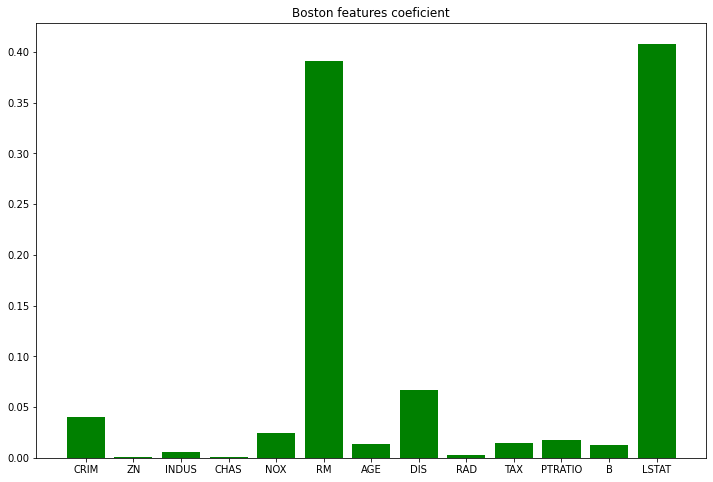

In [12]:
#plotando coeficientes

plt.figure(figsize=(12,8))
plt.title("Boston features coeficient")

plt.bar(height = importance, x = labels, color='green')

plt.show()

In [17]:
#definindo threshold como 0.2 e selecionando features
threshold = 0.20
sfm = SelectFromModel(rf, threshold = threshold)
sfm.fit(X, y)
result_vector = sfm.get_support()

In [18]:
#Armazenando indices das melhores features
selected_index = [i for i,z in enumerate(result_vector) if z]
        
#Armazenando labels das melhores features
selected_labels = [labels[i] for i in selected_index]

print("Best features: ",selected_labels)
print("Index best features: ", selected_index)

Best features:  ['RM', 'LSTAT']
Index best features:  [5, 12]


In [20]:
from sklearn.model_selection import train_test_split

In [23]:
#Treinando modelo com todas features

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

rf_def = RandomForestRegressor()
rf_def.fit(X_train, y_train)
score_def = rf_def.score(X_test, y_test)

print(score_def)

0.8677638709906095


In [25]:
#Treinando modelo apenas com as features selecionadas

#dividindo X
X_feat = X[:,selected_index]
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(X_feat, y, random_state = 10)

rf_feat = RandomForestRegressor()
rf_feat.fit(X_train_feat, y_train_feat)
score_feat = rf_feat.score(X_test_feat, y_test_feat)

print(score_feat)

0.6560974640324693


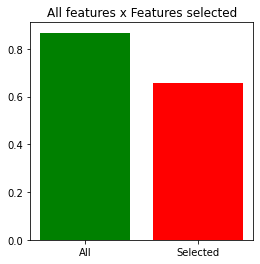

In [26]:
plt.figure(figsize=(4,4))
plt.title("All features x Features selected")

plt.bar(height = [score_def, score_feat], x = ["All", "Selected"], color=['green','red'])

plt.show()

#### Aplicando bases no modelo SVM

In [27]:
from sklearn.svm import SVR

In [28]:
svm_def = SVR()
svm_def.fit(X_train, y_train)
svm_score_def = svm_def.score(X_test, y_test)

svm_feat = SVR()
svm_feat.fit(X_train_feat, y_train_feat)
svm_score_feat = svm_feat.score(X_test_feat, y_test_feat)

print("All features: ",svm_score_def)
print("Selected features: ",svm_score_feat)

All features:  0.01880865797614728
Selected features:  0.5605915187692972


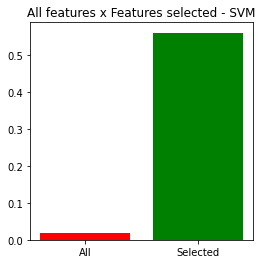

In [29]:
plt.figure(figsize=(4,4))
plt.title("All features x Features selected - SVM")

plt.bar(height = [svm_score_def, svm_score_feat], x = ["All", "Selected"], color=['red','green'])

plt.show()